1. How do you load and run inference on a custom image using the YOLOv8 model (labeled as YOLOv9)?

In [1]:
%pip install ultralytics                                             # install dependencies

from ultralytics import YOLO                                        # import libeary
model = YOLO('yolov8n.pt')                                          # import pre trained model

results = model.predict(source='D:\Document\DeepLearning_Assignment\Image4.jpg', show=True)      # add path of image
                                                                    
for result in results:                                              # access the prediction
    print(result.boxes.xyxy)  # Bounding boxes
    print(result.boxes.conf)  # Confidence scores
    print(result.boxes.cls)   # Class labels


results = model.predict(source='D:\Document\DeepLearning_Assignment\Image4.jpg', conf=0.5, iou=0.4) # create customization



<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\3786576111.py:6: SyntaxWarning: invalid escape sequence '\D'
  results = model.predict(source='D:\Document\DeepLearning_Assignment\Image4.jpg', show=True)      # add path of image
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\3786576111.py:14: SyntaxWarning: invalid escape sequence '\D'
  results = model.predict(source='D:\Document\DeepLearning_Assignment\Image4.jpg', conf=0.5, iou=0.4) # create customization

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Note: you may need to restart the kernel to use updated packages.


100%|██████████| 6.25M/6.25M [00:10<00:00, 618kB/s] 



image 1/1 D:\Document\DeepLearning_Assignment\Image4.jpg: 448x640 4 persons, 186.8ms
Speed: 12.7ms preprocess, 186.8ms inference, 12.9ms postprocess per image at shape (1, 3, 448, 640)
tensor([[  0.6426,  50.8970,  92.0247, 161.1640],
        [126.8539,  62.0174, 214.3711, 182.4172],
        [ 78.4128,  61.4072, 136.1581, 170.1992],
        [190.8669,  67.3363, 254.3799, 160.4680]])
tensor([0.8529, 0.8446, 0.6985, 0.6550])
tensor([0., 0., 0., 0.])

image 1/1 D:\Document\DeepLearning_Assignment\Image4.jpg: 448x640 4 persons, 118.9ms
Speed: 6.0ms preprocess, 118.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


2. How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture?

In [2]:
# To load the Faster R-CNN model with a ResNet-50 backbone and print its architecture, you can use PyTorch's torchvision library

# %pip install torch torchvision

# Import and load the Faster R-CNN model pre-trained on the COCO dataset
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model with a ResNet-50 backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)

print(model)
 

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

2. How do you perform inference on an online image using the Faster RCNN model and print the predictions?

In [3]:
# Install Required Libraries

# %pip install torch torchvision pillow requests   

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the model (pretrained on COCO dataset)
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO

# Download the image from a URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiZwubgy74tlyoNN2YQHOlruXstBmV-hmwdQ&s"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor()  # Convert image to tensor
])

# Preprocess the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(input_tensor)

# Get the first image's predictions
predictions = predictions[0]

# Access bounding boxes, labels, and scores
boxes = predictions['boxes']
labels = predictions['labels']
scores = predictions['scores']

# Print predictions
for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
    if score > 0.5:  # Only display predictions with confidence > 0.5
        print(f"Prediction {i + 1}:")
        print(f"  Box: {box.tolist()}")
        print(f"  Label: {label.item()}")
        print(f"  Score: {score.item():.2f}")




Prediction 1:
  Box: [61.15170669555664, 50.645748138427734, 128.6640167236328, 164.15081787109375]
  Label: 1
  Score: 0.65
Prediction 2:
  Box: [26.887939453125, 11.813825607299805, 127.47421264648438, 166.0533447265625]
  Label: 1
  Score: 0.63
Prediction 3:
  Box: [73.5287094116211, 97.65690612792969, 149.1781005859375, 164.22756958007812]
  Label: 62
  Score: 0.57
Prediction 4:
  Box: [160.32806396484375, 10.64650821685791, 293.626220703125, 159.11056518554688]
  Label: 2
  Score: 0.53
Prediction 5:
  Box: [252.09823608398438, 46.25258255004883, 296.1932678222656, 129.11563110351562]
  Label: 2
  Score: 0.50


4. How do you load an image and perform inference using YOLOv9, then display the detected objects with bounding boxes and class labels?


0: 384x640 1 bus, 1 train, 182.8ms
Speed: 25.1ms preprocess, 182.8ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)


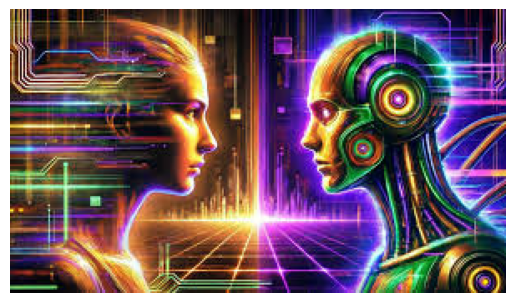

In [4]:
# %pip install ultralytics

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the YOLOv9 model (assuming YOLOv8 is being used)
model = YOLO('yolov8n.pt')  # Replace with your YOLOv9 model weights
from PIL import Image

image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiZwubgy74tlyoNN2YQHOlruXstBmV-hmwdQ&s"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Run inference
results = model.predict(source=image)

# Access prediction results
for result in results:
    boxes = result.boxes.xyxy.numpy()  # Bounding box coordinates
    confidences = result.boxes.conf.numpy()  # Confidence scores
    class_ids = result.boxes.cls.numpy()  # Class IDs
    class_names = result.names  # Class names

    # Load the image as a NumPy array for visualization
    image_np = np.array(image)

    # Draw bounding boxes and labels
    for i, box in enumerate(boxes):
        if confidences[i] > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_ids[i])]}: {confidences[i]:.2f}"

            # Draw bounding box
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Put label
            cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()




5. How do you display bounding boxes for the detected objects in an image using Faster RCNN?

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\2614132234.py:12: SyntaxWarning: invalid escape sequence '\D'
  image_path = 'D:\Document\DeepLearning_Assignment\Image4.jpg'  # Replace with your image path


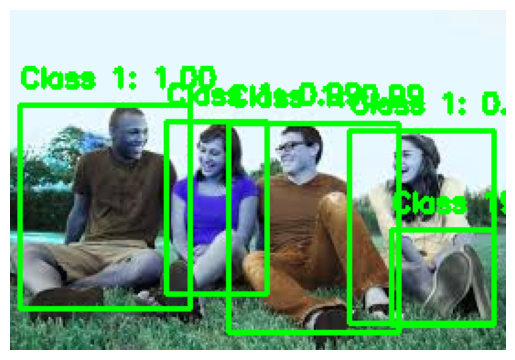

In [5]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(weights = True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms

# Load the image
image_path = 'D:\Document\DeepLearning_Assignment\Image4.jpg'  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Transform the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

with torch.no_grad():
    predictions = model(input_tensor)
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Extract the first image's predictions
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()
labels = predictions['labels'].cpu().numpy()
scores = predictions['scores'].cpu().numpy()

# Set confidence threshold
confidence_threshold = 0.5

# Convert the image to a NumPy array
image_np = np.array(image)

# Draw bounding boxes and labels
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:  # Filter by confidence
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {labels[i]}: {scores[i]:.2f}"

        # Draw bounding box
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Put label
        cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




6. How do you perform inference on a local image using Faster RCNN?

In [6]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights=True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms

# Path to the local image
image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    predictions = model(input_tensor)
# Extract predictions for the first image
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()  # Bounding box coordinates
labels = predictions['labels'].cpu().numpy()  # Class labels
scores = predictions['scores'].cpu().numpy()  # Confidence scores

# Print predictions
confidence_threshold = 0.5  # Confidence threshold
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:
        print(f"  Object {i + 1}:")
        print(f"  Label: {labels[i]}")  # Class label (COCO dataset IDs)
        print(f"  Confidence: {scores[i]:.2f}")
        print(f"  Bounding Box: {box}")


<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\4245135341.py:12: SyntaxWarning: invalid escape sequence '\D'
  image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"


  Object 1:
  Label: 1
  Confidence: 1.00
  Bounding Box: [      5.638      52.921      98.964      163.86]
  Object 2:
  Label: 1
  Confidence: 0.99
  Bounding Box: [     185.09      66.762      264.47      171.62]
  Object 3:
  Label: 1
  Confidence: 0.99
  Bounding Box: [     119.33      62.435         213      176.09]
  Object 4:
  Label: 1
  Confidence: 0.99
  Bounding Box: [     85.888      61.958      140.27      155.16]
  Object 5:
  Label: 19
  Confidence: 0.71
  Bounding Box: [     208.11      120.82      264.06      172.96]


7. How can you change the confidence threshold for YOLO object detection and filter out low-confidence predictions?

In [8]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights=True)
model.eval()  # Set the model to evaluation mode

from PIL import Image
from torchvision import transforms

# Path to the local image
image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    predictions = model(input_tensor)
# Extract predictions for the first image
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()  # Bounding box coordinates
labels = predictions['labels'].cpu().numpy()  # Class labels
scores = predictions['scores'].cpu().numpy()  # Confidence scores

# Print predictions
confidence_threshold = 0.3  # Confidence threshold
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:
        print(f"  Object {i + 1}:")
        print(f"  Label: {labels[i]}")  # Class label (COCO dataset IDs)
        print(f"  Confidence: {scores[i]:.2f}")
        print(f"  Bounding Box: {box}")


<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\3021339890.py:12: SyntaxWarning: invalid escape sequence '\D'
  image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"


  Object 1:
  Label: 1
  Confidence: 1.00
  Bounding Box: [      5.638      52.921      98.964      163.86]
  Object 2:
  Label: 1
  Confidence: 0.99
  Bounding Box: [     185.09      66.762      264.47      171.62]
  Object 3:
  Label: 1
  Confidence: 0.99
  Bounding Box: [     119.33      62.435         213      176.09]
  Object 4:
  Label: 1
  Confidence: 0.99
  Bounding Box: [     85.888      61.958      140.27      155.16]
  Object 5:
  Label: 19
  Confidence: 0.71
  Bounding Box: [     208.11      120.82      264.06      172.96]
  Object 6:
  Label: 15
  Confidence: 0.48
  Bounding Box: [          0       91.06      212.18      171.44]
  Object 7:
  Label: 18
  Confidence: 0.48
  Bounding Box: [     5.9936       149.6      55.353      174.26]
  Object 8:
  Label: 1
  Confidence: 0.44
  Bounding Box: [     56.414       58.62      135.09       173.3]
  Object 9:
  Label: 1
  Confidence: 0.43
  Bounding Box: [    0.78352      126.28      100.46      167.34]


8. How do you plot the training and validation loss curves for model evaluation?

In [ ]:
training_losses = []  # List to store training loss
validation_losses = []  # List to store validation loss

for epoch in range(num_epochs):
    # Training loop
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    training_losses.append(train_loss / len(train_loader))

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    validation_losses.append(val_loss / len(val_loader))

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


9. How do you perform inference on multiple images from a local folder using Faster RCNN and display the 
bounding boxes for each?

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

import os
from PIL import Image

# Specify the folder containing images
image_folder = "path/to/your/image/folder"
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.png', '.jpg', '.jpeg'))]

from torchvision import transforms

# Define a transformation to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Confidence threshold for displaying results
confidence_threshold = 0.5

# Loop through images and perform inference
for image_path in image_paths:
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Perform inference
    with torch.no_grad():
        predictions = model(input_tensor)[0]

    # Extract predictions
    boxes = predictions['boxes'].cpu().numpy()
    labels = predictions['labels'].cpu().numpy()
    scores = predictions['scores'].cpu().numpy()

    # Convert the image to a NumPy array for visualization
    image_np = np.array(image)

    # Draw bounding boxes and labels
    for i, box in enumerate(boxes):
        if scores[i] > confidence_threshold:
            x1, y1, x2, y2 = map(int, box)
            label = f"Class {labels[i]}: {scores[i]:.2f}"

            # Draw bounding box
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Put label
            cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detections for {os.path.basename(image_path)}")
    plt.show()


10. How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster 
RCNN?

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\3712525468.py:12: SyntaxWarning: invalid escape sequence '\D'
  image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"  # Replace with your image path


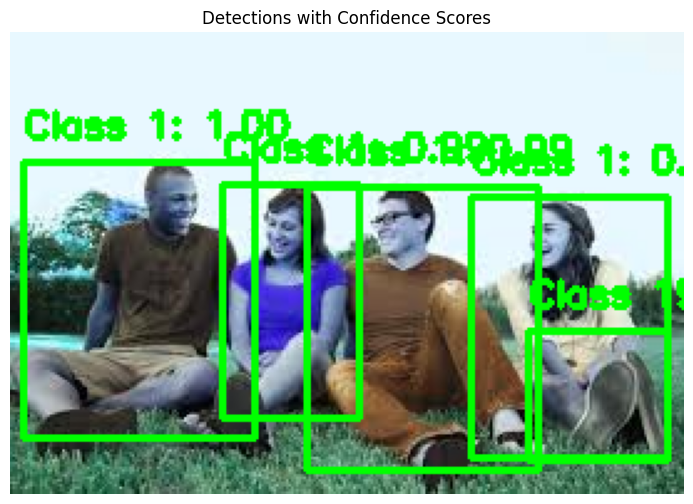

In [10]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode

from PIL import Image
from torchvision import transforms

# Load and preprocess the image
image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()  # Convert to tensor
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

with torch.no_grad():
    predictions = model(input_tensor)
    
    
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extract predictions
predictions = predictions[0]
boxes = predictions['boxes'].cpu().numpy()  # Bounding box coordinates
scores = predictions['scores'].cpu().numpy()  # Confidence scores
labels = predictions['labels'].cpu().numpy()  # Class labels

# Set confidence threshold
confidence_threshold = 0.5

# Convert image to NumPy array for visualization
image_np = np.array(image)

# Draw bounding boxes and labels
for i, box in enumerate(boxes):
    if scores[i] > confidence_threshold:  # Filter by confidence
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {labels[i]}: {scores[i]:.2f}"  # Add confidence score to label

        # Draw bounding box
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Put label and confidence score
        cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes and confidence scores
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detections with Confidence Scores")
plt.show()


11. How can you save the inference results (with bounding boxes) as a new image after performing detection 
using YOLO

In [11]:
from ultralytics import YOLO  # Replace with your YOLO model library

# Load the pre-trained YOLO model
model = YOLO("yolov8n.pt")

from PIL import Image

# Load the image
image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"
image = Image.open(image_path).convert("RGB")

results = model.predict(image)  

import cv2
import numpy as np

# Convert the image to a NumPy array for visualization
image_np = np.array(image)

for result in results:
    boxes = result.boxes
    for box in boxes:
        xyxy = box.xyxy
        conf = box.conf
        cls = box.cls
        print(f"Class: {int(cls)}, Confidence: {float(conf)}, Coordinates: {xyxy}")
# Convert the image back to BGR format (for OpenCV saving)
image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Save the image
output_path = "image_with_boxes.jpg"
cv2.imwrite(output_path, image_bgr)

print(f"Saved annotated image to: {output_path}")





<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_29864\330199086.py:9: SyntaxWarning: invalid escape sequence '\D'
  image_path = "D:\Document\DeepLearning_Assignment\Image4.jpg"



0: 448x640 4 persons, 157.2ms
Speed: 7.0ms preprocess, 157.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Class: 0, Confidence: 0.8529407978057861, Coordinates: tensor([[  0.6426,  50.8970,  92.0247, 161.1640]])
Class: 0, Confidence: 0.8446105718612671, Coordinates: tensor([[126.8539,  62.0174, 214.3711, 182.4172]])
Class: 0, Confidence: 0.6985240578651428, Coordinates: tensor([[ 78.4128,  61.4072, 136.1581, 170.1992]])
Class: 0, Confidence: 0.6549997925758362, Coordinates: tensor([[190.8669,  67.3363, 254.3799, 160.4680]])
Saved annotated image to: image_with_boxes.jpg
